In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

In [17]:
def train_and_plot(func, x_range, points = 100, noise=0.1, label='Function', epochs=200):
    x_train = np.linspace(*x_range, points) # * é usado para desempacotar a tupla (nem sabia que existia)
    y_train = func(x_train)
    y_train += np.random.normal(0, noise, size=x_train.shape)
    
    model = keras.Sequential([
        keras.layers.Input(shape=(1,)),
        keras.layers.Dense(30, activation='tanh'),
        keras.layers.Dense(30, activation='tanh'),
        keras.layers.Dense(30, activation='tanh'),
        keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    model.fit(x_train, y_train, epochs=epochs, batch_size=32, verbose=0)
    
    x_test = np.linspace(*x_range, points) 
    y_pred = model.predict(x_test)
    
    plt.scatter(x_train, y_train, label='Training Data', color='red', s=10)
    plt.plot(x_test, func(x_test), label=label)
    plt.plot(x_test, y_pred, label='NN Prediction')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(label)
    plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


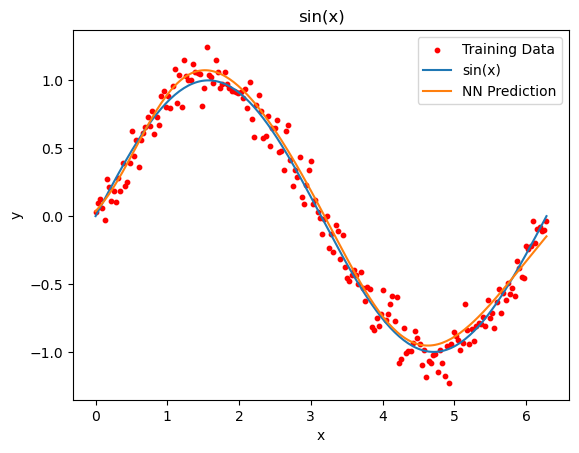

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  


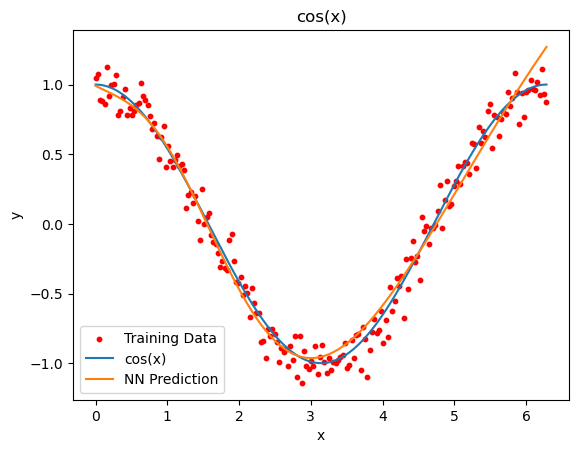

In [21]:
# Seno
train_and_plot(np.sin, (0, 2*np.pi), label='sin(x)', points = 200)

# Cosseno
train_and_plot(np.cos, (0, 2*np.pi), label='cos(x)', points = 200)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


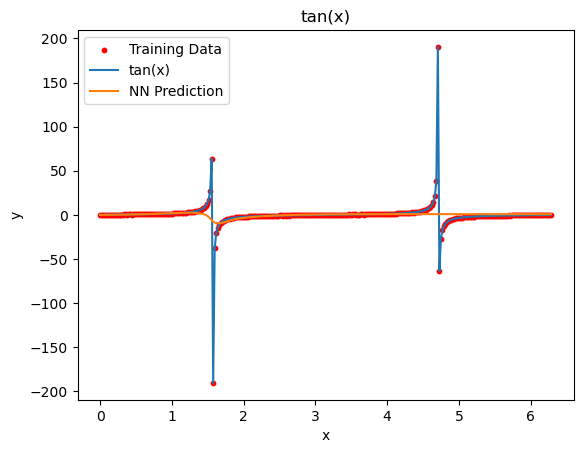

In [35]:
# Tangente
def safe_tan(x):
    # Evita valores extremos próximos a pi/2, 3pi/2, etc.
    return np.tan(x)
train_and_plot(safe_tan, (0, 2*np.pi), label='tan(x)', points = 300, epochs = 500)

A tangente é a função mais complicada de se treinar, há pontos de descontinuidade onde há valores muito extremos. Escolher melhor os pontos de treinamento perto dessas descontinuidades poderia ajudar, bem como mais pontos e uma rede maior. Mas para esse tipo de modelo não se espera uma performance muito boa de qualquer forma.

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


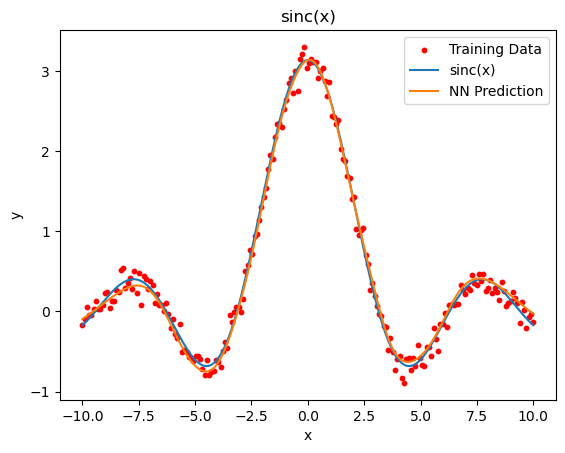

In [37]:
# Sinc
def sinc(x):
    return np.sinc(x/np.pi)*np.pi # np.sinc já faz sin(pi*x)/(pi*x)
train_and_plot(sinc, (-10, 10), label='sinc(x)', points = 200, noise = 0.1, epochs = 1000)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  


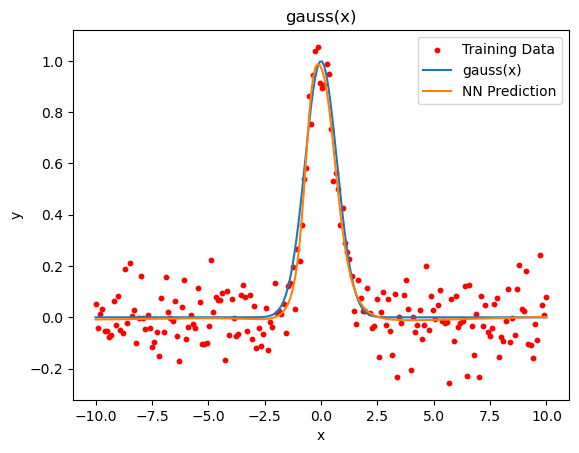

In [38]:
# Gaussiana
def gauss(x):
    return np.exp(-x**2)
train_and_plot(gauss, (-10, 10), label='gauss(x)', points  = 200, epochs = 1000)